In [2]:
import strava_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
activities = strava_utils.get_activities()
df = strava_utils.activities_to_df(activities)

run_df = df[df['type'] == 'Run']
run_df = strava_utils.fill_missing_dates(run_df)

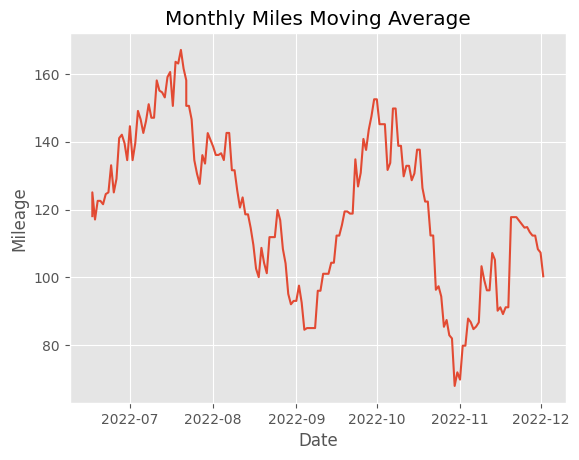

In [10]:
run_df['distance'] = run_df['distance'].apply(lambda x: 0 if np.isnan(x) else x)
run_df['distance_ma'] = run_df['distance'].rolling(30).sum()

fig = plt.figure()
plt.plot(run_df.index, run_df['distance_ma'])
plt.title('Monthly Miles Moving Average')
plt.xlabel('Date')
plt.ylabel('Mileage')
plt.show()

In [12]:
import base64
from io import BytesIO

tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

filename = 'dashboard.html'
html = f'<img src=\'data:image/png;base64,{encoded}\'>'

with open(filename,'w') as f:
    f.write(html)